# Number of inhabitants per district per segment extraction

We will try to find significant correlations between historical episodes (2008 on for the economical crisis) and any district in Madrid by analysing drastic or significant changes in the census.

We will evaluate this correlation for different segments in the population of Madrid such as nationality (spanish or not), gender and age range.

The numbers from the census are extracted from each year (2003-2016) at December except for 2017 that the data corresponds to July.

In [1]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt  
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline

In [62]:
def extract_header(df, n_rows):
    df_clean = df.iloc[n_rows:].copy()
    header = df.iloc[:n_rows].copy()
    return header, df_clean

def extract_footer(df, n_rows):
    df_clean = df.iloc[:-n_rows].copy()
    footer = df.iloc[-n_rows:].copy()
    return footer, df_clean

def index_to_column(df, index_levels):
    return df.reset_index(level=index_levels)

def split_dataframes_by_index_pattern(df, pattern, clean=True):
    list_df = []
    # map each bunch of data with an id and map it to the string that contain the pattern
    new_col_values = df.index.str.contains(pattern)
    df['new_df'] = new_col_values.astype(int)
    df['new_df'] = df['new_df'].cumsum()
    new_col = df.index[new_col_values]
    
    # create a mapper series with index integers as new_df and values as content of pattern
    new_col = pd.Series(new_col, index=range(1,len(new_col)+1))
    df['new_df'] = df['new_df'].map(new_col)
    
    # clean rows that contain pattern
    if clean:
        df = df[~(new_col_values)].copy()
    return df, new_col 

def re_define_column_names(df, list_columns):
    df.columns = list_columns
    return df

def add_column(df, column_name, value):
    df[column_name] = value
    return df

def age_range_plot(segment, depth, title, y_min, y_max):
    plt.figure(figsize=(15, 5)) 
    
    # Remove the plot frame lines. They are unnecessary chartjunk.    
    ax = plt.subplot(111)    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    
    # Ensure that the axis ticks only show up on the bottom and left of the plot.    
    # Ticks on the right and top of the plot are generally unnecessary chartjunk.    
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()
    
    plt.ylim(y_min, y_max) 
    
    ax.grid(color='b', linestyle='--', linewidth=2, alpha=0.2)
    colors = ["#00ced1","#ff7500", "#ff4500", "#4682b4", "#808080"]
    sns.barplot(x='district',y=segment,
                data=df_total_ratio[(df_total_ratio['year'] == '2017') & \
                                (df_total_ratio['age_range'] != 'Total')],
                hue='age_range', palette=sns.color_palette(colors))
    ax.set_title(title)
    plt.text(0, depth, "Data source: "+link_censo_madrid+    
           "\nAuthor: Celsa Diaz", fontsize=8)
    plt.legend(loc = 'upper left')
    _ = plt.xticks(rotation='vertical')

In [3]:
# Special variables for census data cleaning
# extract only those records with index of interst
idx_to_col_id = 1
list_str_patterns = ['TODOS','Total','0 - 4','5 - 9','10 - 14','15 - 19',
 '20 - 24','25 - 29','30 - 34','35 - 39','40 - 44','45 - 49','50 - 54',
 '55 - 59','60 - 64','65 - 69','70 - 74','75 - 79','80 - 84','85 - 89',
 '90 - 94','95 - 99','100 o más']
n_rows_header = 4
n_rows_footer = 4
district_pattern_id = 'TODOS'
list_columns = ['spanish_men', 'spanish_women', 'spanish_total', 'foreign_men', 'foreign_women', 
                'foreign_total', 'men_total', 'women_total', 'total', 'district']
path = './data/'
census_files = [f for f in listdir(path) if isfile(join(path, f)) if f[-4:] == '.xls']
link_censo_madrid = "http://www-2.munimadrid.es/TSE6/control/seleccionDatosBarrio"

In [4]:
# extract csv files and clean data
df_list = []
for file in census_files:
    df = pd.read_excel(path + file)
    print(path + file)
    
    # leave only as index what is an index
    df = index_to_column(df, idx_to_col_id)
    
    # clean header and footer
    header, df_clean = extract_header(df, n_rows_header)
    footer, df_clean = extract_footer(df_clean, n_rows_footer)
    
    # extract districts as a new column
    df, distrits = split_dataframes_by_index_pattern(df_clean, district_pattern_id, True)
    df = re_define_column_names(df, list_columns)
    
    # add new columns that identify file data
    date = header['level_1'][0]
    year = date.split('-')[2]
    print(year, date)
    df = add_column(df, 'date', date)
    df = add_column(df, 'year', year)
    
    df_list.append(df)
    
df_total = pd.concat(df_list)    

./data/madrid_censo_distrito_07_2017.xls
2017 01-01-2017
./data/madrid_censo_distrito_12_2004.xls
2004 01-01-2004
./data/madrid_censo_distrito_12_2005.xls
2005 01-01-2005
./data/madrid_censo_distrito_12_2006.xls
2006 01-01-2006
./data/madrid_censo_distrito_12_2007.xls
2007 01-01-2007
./data/madrid_censo_distrito_12_2008.xls
2008 01-01-2008
./data/madrid_censo_distrito_12_2009.xls
2009 01-01-2009
./data/madrid_censo_distrito_12_2010.xls
2010 01-01-2010
./data/madrid_censo_distrito_12_2011.xls
2011 01-01-2011
./data/madrid_censo_distrito_12_2012.xls
2012 01-01-2012
./data/madrid_censo_distrito_12_2013.xls
2013 01-01-2013
./data/madrid_censo_distrito_12_2014.xls
2014 01-01-2014
./data/madrid_censo_distrito_12_2015.xls
2015 01-01-2015
./data/madrid_censo_distrito_12_2016.xls
2016 01-01-2016


In [5]:
# clean district's names
district_dict = {'ARGANZUELA / TODOS': 'Arganzuela',
 'BARAJAS / TODOS': 'Barajas',
 'CARABANCHEL / TODOS': 'Carabanchel',
 'CENTRO / TODOS': 'Centro',
 'CHAMARTIN / TODOS': 'Chamartín',
 'CHAMBERI / TODOS': 'Chamberí',
 'CIUDAD LINEAL / TODOS': 'Ciudad Lineal',
 'FUENCARRAL-EL PARDO / TODOS': 'Fuencarral - El Pardo',
 'HORTALEZA / TODOS': 'Hortaleza',
 'LATINA / TODOS': 'Latina',
 'MONCLOA-ARAVACA / TODOS': 'Moncloa - Aravaca',
 'MORATALAZ / TODOS': 'Moratalaz',
 'PUENTE DE VALLECAS / TODOS': 'Puente de Vallecas',
 'RETIRO / TODOS': 'Retiro',
 'SALAMANCA / TODOS': 'Salamanca',
 'SAN BLAS-CANILLEJAS / TODOS': 'San Blas - Canillejas',
 'TETUAN / TODOS': 'Tetuán',
 'USERA / TODOS': 'Usera',
 'VICALVARO / TODOS': 'Vicálvaro',
 'VILLA DE VALLECAS / TODOS': 'Villa de Vallecas',
 'VILLAVERDE / TODOS': 'Villaverde'}

df_total['district'] = df_total['district'].apply(lambda x: district_dict[x])

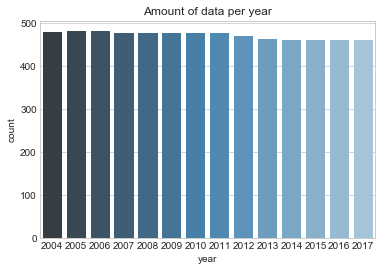

In [6]:
# check if there was a significant change in the population over the time
count_year = df_total.loc[:, ['date','year']].rename(columns={'date':'count'}).groupby(['year']).count().reset_index()
sns.set_style("whitegrid")
ax = sns.barplot(x='year', y='count', data=count_year, palette="Blues_d")
ax.set_title('Amount of data per year')

It seems that the population goes slowly down after the economical crisis.

### Generate ratio n_inhabitants (2017) / n_inhabitants (2004) for each segment

###### Segments of interest:
* Spanish vs Foreign
* Women vs Men
* Total

###### Age ranges of interest:
* 0-24 Young
* 25-39 Early workers
* 40-64 Adult workers
* 65-84 Early pensionists
* 85-100 Late pensionists

In [7]:
# Aggregate age segments
age_ranges = {'0-24': ['_0 - 4','_5 - 9','10 - 14','15 - 19','20 - 24'],
              '25-39': ['25 - 29','30 - 34','35 - 39'],
              '40-64': ['40 - 44','45 - 49','50 - 54','55 - 59','60 - 64'],
              '65-84': ['65 - 69','70 - 74','75 - 79','80 - 84'],
              '85-100': ['85 - 89','90 - 94','95 - 99','100 o más'],
              'Total': ['Total']}
age_ranges = pd.DataFrame(pd.DataFrame.from_dict(age_ranges, orient='index').stack())\
                    .reset_index().drop(['level_1'],axis=1).rename(columns={'level_0':'age_range',0:'ages'})

segments = ['spanish_men','spanish_women','spanish_total','foreign_total','total']

In [8]:
# Assign age aggregate segment
df_total_ = df_total.loc[:,['year','district']+segments].reset_index().rename(columns={'index':'age'})
df_total_agg = df_total_.merge(age_ranges, left_on='age', right_on='ages').drop(['age','ages'],axis=1)

In [9]:
df_total_agg.groupby(['district','year','age_range']).sum().head(6)

spanish_men  spanish_women  spanish_total  \
district   year age_range                                              
Arganzuela 2004 0-24              8575           8250          16825   
                25-39            14493          15016          29509   
                40-64            19195          22860          42055   
                65-84             8075          13407          21482   
                85-100             981           2716           3697   
                Total            56607          67140         123747   

                           foreign_total   total  
district   year age_range                         
Arganzuela 2004 0-24                5114   21939  
                25-39              10750   40259  
                40-64               4818   46873  
                65-84                408   21890  
                85-100                23    3720  
                Total              23420  147167

In [10]:
df_total_agg = df_total_agg.groupby(['district','year','age_range']).sum().reset_index()

In [11]:
## Calculate ratio with respect to values on 2004

# Generate reference for each segment
df_total_agg_ref = df_total_agg[df_total_agg['year'] == '2004'].drop(['year'],axis=1)\
                    .rename(columns={'spanish_men':'spanish_men_ref','spanish_women':'spanish_women_ref',
                                    'spanish_total':'spanish_total_ref','foreign_total':'foreign_total_ref',
                                     'total':'total_ref'})

# Calculate ratio with reference
df_total_ratio = df_total_agg.merge(df_total_agg_ref, left_on=['district','age_range'], 
                                    right_on=['district','age_range'])
df_total_ratio['spanish_men_ratio'] = df_total_ratio['spanish_men']/df_total_ratio['spanish_men_ref']
df_total_ratio['spanish_women_ratio'] = df_total_ratio['spanish_women']/df_total_ratio['spanish_women_ref']
df_total_ratio['spanish_total_ratio'] = df_total_ratio['spanish_total']/df_total_ratio['spanish_total_ref']
df_total_ratio['foreign_total_ratio'] = df_total_ratio['foreign_total']/df_total_ratio['foreign_total_ref']
df_total_ratio['total_ratio'] = df_total_ratio['total']/df_total_ratio['total_ref']

In [12]:
df_total_ratio.to_csv('./data/census_madrid_agg_segments.csv', index=False, encoding='utf-8')

In [13]:
df_total_ratio.head()

,district,year,age_range,spanish_men,spanish_women,spanish_total,foreign_total,total,spanish_men_ref,spanish_women_ref,spanish_total_ref,foreign_total_ref,total_ref,spanish_men_ratio,spanish_women_ratio,spanish_total_ratio,foreign_total_ratio,total_ratio
0,Arganzuela,2004,0-24,8575,8250,16825,5114,21939,8575,8250,16825,5114,21939,1.000000,1.000000,1.000000,1.000000,1.000000
1,Arganzuela,2005,0-24,8341,7999,16340,4993,21333,8575,8250,16825,5114,21939,0.972711,0.969576,0.971174,0.976339,0.972378
2,Arganzuela,2006,0-24,8195,7785,15980,5049,21029,8575,8250,16825,5114,21939,0.955685,0.943636,0.949777,0.987290,0.958521
3,Arganzuela,2007,0-24,7948,7688,15636,4156,19792,8575,8250,16825,5114,21939,0.926880,0.931879,0.929331,0.812671,0.902138
4,Arganzuela,2008,0-24,8011,7737,15748,4574,20322,8575,8250,16825,5114,21939,0.934227,0.937818,0.935988,0.894408,0.926296


### Explore population on 2017 and ratio of variation since 2004 per districts and per segment

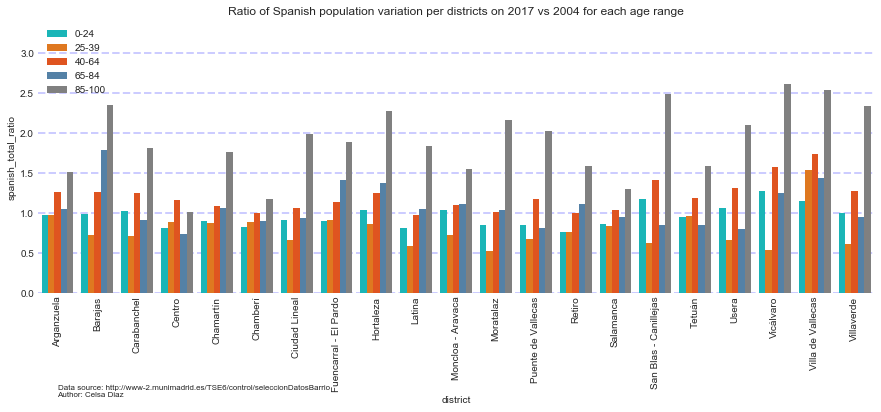

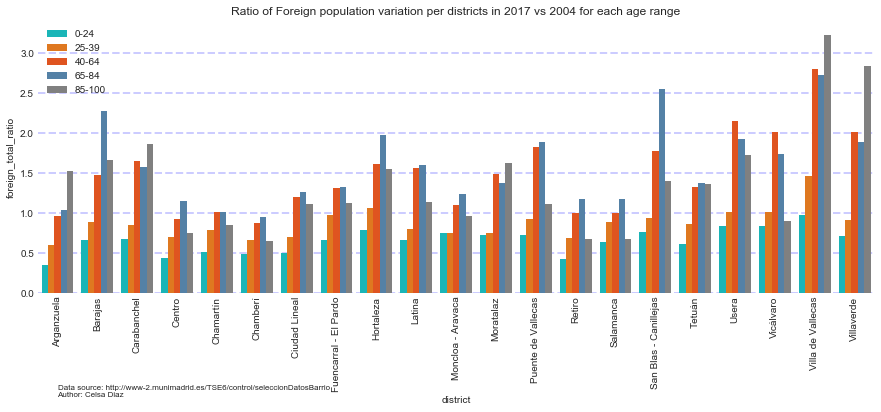

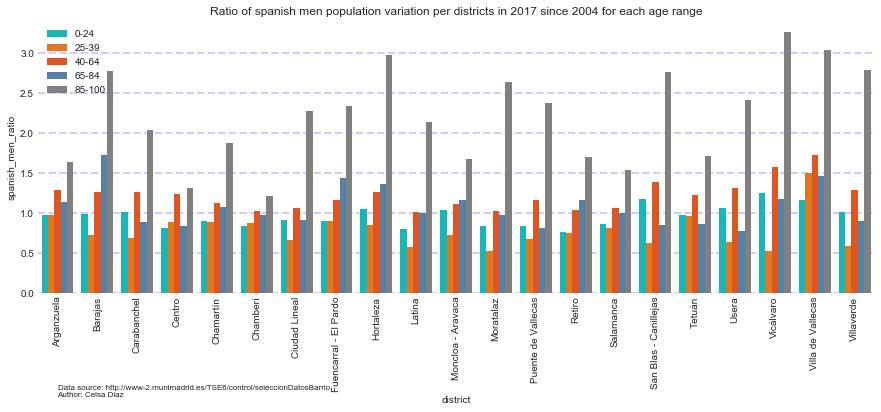

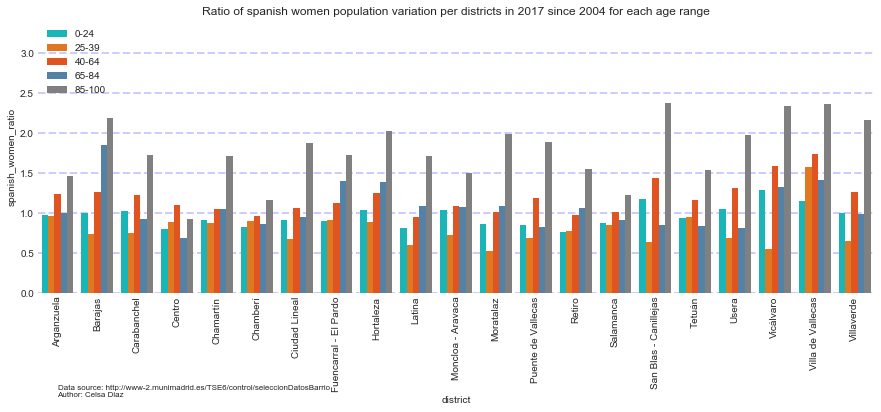

In [63]:
segment = "spanish_total_ratio"
depth = -1.3
y_max = 3.4
y_min = 0
title = "Ratio of Spanish population variation per districts on 2017 vs 2004 for each age range"
age_range_plot(segment, depth, title, y_min, y_max)

segment = "foreign_total_ratio"
y_max = 3.4
y_min = 0
title = "Ratio of Foreign population variation per districts in 2017 vs 2004 for each age range"
age_range_plot(segment, depth, title, y_min, y_max)

segment = "spanish_men_ratio"
y_max = 3.4
y_min = 0
title = "Ratio of spanish men population variation per districts in 2017 since 2004 for each age range"
age_range_plot(segment, depth, title, y_min, y_max)

segment = "spanish_women_ratio"
y_max = 3.4
y_min = 0
title = "Ratio of spanish women population variation per districts in 2017 since 2004 for each age range"
age_range_plot(segment, depth, title, y_min, y_max)

###### Conclusions:
* Districts where the rate of non-active young population did not decrease are mainly Vicálvaro, Usera, Villa de Vallecas, Hortaleza, Canillejas, Moncloa and Carabanchel. Tradionally, those are worker districts but Moncloa (but this is a university district).
* On the other hand, richer districts show a decrease on the number of young people under 25.
* All segments show a significant increase of eldery in all districts. Only in Moratalaz and Vicálvaro adult foreigners and in Centro adult women are segments where adult population increased more than eldery.
* The only district where adult population grows more than eldery is in the segment of women in Centro. 
* In the gentrified areas, there is no difference on the increase of the population between genders but in Centro where the amount of eldery men increase more than eldery women. On the other hand, Centro, Arganzuela and Retiro had an increase on the spanish population whereas La Latina had a higher increase of foreign population.
* There is a clear decrease in all segments on the early adult population. Probably, they all tend to run away.
* To summarize, the Centro district is gentrified by adult women and older men. There is also a difference on gentrification trends by spaniards and foreigners focusing this last segment on La Latina. 
* On the other hand, most of those who decide to have a family, have to choose a worker district in the suburbs. Finally, there is a decrease of early adults in all segments in all districts, even worker districts.